In [87]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

In [71]:
import pandas as pd
bank = pd.read_csv(r"C:\Users\ayush\Downloads\bank-full.csv",sep=";")
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [72]:
bank.shape

(45211, 17)

In [73]:
bank = bank.dropna()
bank.shape

(45211, 17)

In [74]:
bank1 = bank.copy()

In [75]:
#converting all yes/no into 1/0
bank1.y.replace(("yes","no"),(1,0),inplace = True)
bank1.default.replace(("yes","no"),(1,0),inplace = True)
bank1.housing.replace(("yes","no"),(1,0),inplace = True)
bank1.loan.replace(("yes","no"),(1,0),inplace = True)

In [130]:
# creating dummies for object data
bank1 = pd.get_dummies(bank1)
bank1.head()

,y,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [77]:
bank1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   default              45211 non-null  int64
 2   balance              45211 non-null  int64
 3   housing              45211 non-null  int64
 4   loan                 45211 non-null  int64
 5   day                  45211 non-null  int64
 6   duration             45211 non-null  int64
 7   campaign             45211 non-null  int64
 8   pdays                45211 non-null  int64
 9   previous             45211 non-null  int64
 10  y                    45211 non-null  int64
 11  job_admin.           45211 non-null  uint8
 12  job_blue-collar      45211 non-null  uint8
 13  job_entrepreneur     45211 non-null  uint8
 14  job_housemaid        45211 non-null  uint8
 15  job_management       45211 non-null  uint8
 16  job_retired          4

In [78]:
# to change the y variable position as it will be easy to split the data
col=bank1["y"]
bank1.drop(labels=["y"],axis=1,inplace = True)
bank1.insert(0,"y", col)
bank1.head()

,y,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,58,0,2143,1,0,5,261,1,-1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,44,0,29,1,0,5,151,1,-1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
2,0,33,0,2,1,1,5,76,1,-1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,0,47,0,1506,1,0,5,92,1,-1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
4,0,33,0,1,0,0,5,198,1,-1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [88]:
# Dividing our data into input and output variables 
X = bank1.iloc[:,1:]
Y = bank1.iloc[:,0]

In [89]:
#Logistic regression and fit the model
"""
The classifier.fit() method in Python is used to train a machine learning model. The method takes two arguments: the training 
data and the target values. The training data is a set of examples that the model will use to learn how to predict the target 
values. The target values are the desired outputs for the training data.

The classifier.fit() method works by iterating through the training data and updating the model's parameters. The parameters are
the values that the model uses to make predictions. The model updates its parameters so that it can make better predictions for
the training data.

Once the classifier.fit() method has finished, the model is ready to be used to make predictions. The model can be used to make 
predictions by passing new data to the classifier.predict() method.

In the context of the bank marketing dataset, the classifier.fit() method would be used to train a logistic regression model on
the training data. The training data would consist of the features of the customers, such as their age, marital status, and
education. The target values would be whether the customer subscribed to a term deposit or not.

The classifier.fit() method would then iterate through the training data and update the model's parameters. The model would 
update its parameters so that it can make better predictions for the training data. Once the classifier.fit() method has 
finished, the model would be ready to be used to make predictions.

The predictions from the model could then be used to understand which features are most important for predicting whether a 
customer will subscribe to a term deposit. The predictions could also be used to improve the bank's marketing campaign."""
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [92]:
"""
The classifier.predict() method in Python is used to make predictions on new data using a trained machine learning model. The 
method takes one argument: the new data. The new data is a set of examples that the model will use to make predictions.

The classifier.predict() method works by passing the new data through the model's parameters. The parameters are the values that
the model uses to make predictions. The model then outputs the predicted values for the new data."""
#Predict for X dataset
# classifer.read_pickle_file('path of file.pkl')
y_pred = classifier.predict(X)
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [129]:
"""The classifier.predict(X) method makes predictions on the X variable. The X variable is the feature data. 
The classifier.predict(X) method outputs the predicted class labels"""
y_pred_df = pd.DataFrame({'actual': Y,
                          # 'prob': classifier.predict_proba(X)[:,1],
                         'predicted': classifier.predict(X)})

In [104]:
y_pred_df[40:80]

,actual,predicted
40,0,0
41,0,0
42,0,0
43,0,1
44,0,0
45,0,0
46,0,0
47,0,0
48,0,0
49,0,0


In [105]:
y_pred_df.head()

,actual,predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [106]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']
#display(y_pred_df[20:80])
y_pred_df['correct'].mean()
#y_pred_df['correct'].value_counts()

0.8909778593705072

In [107]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39122   800]
 [ 4129  1160]]


In [112]:
1160 / (4129 + 1160)

0.2193231234637928

In [111]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     39922
           1       0.59      0.22      0.32      5289

    accuracy                           0.89     45211
   macro avg       0.75      0.60      0.63     45211
weighted avg       0.87      0.89      0.87     45211



In [113]:
# ROC Curve

Text(0, 0.5, 'True Positive Rate')

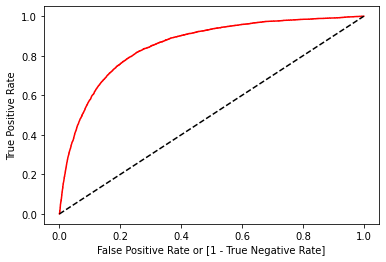

In [114]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(Y, classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y, y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

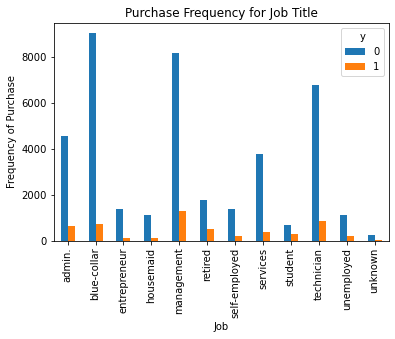

In [117]:
%matplotlib inline
table=pd.crosstab(bank.job,bank1.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

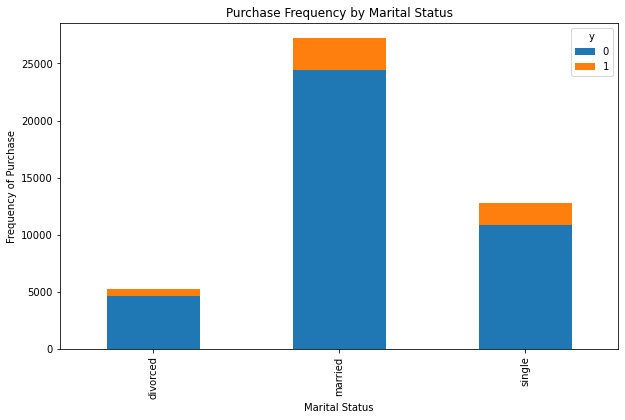

In [120]:
table = pd.crosstab(bank.marital, bank1.y)
table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Purchase Frequency by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_marital_stacked_bar')
plt.show()


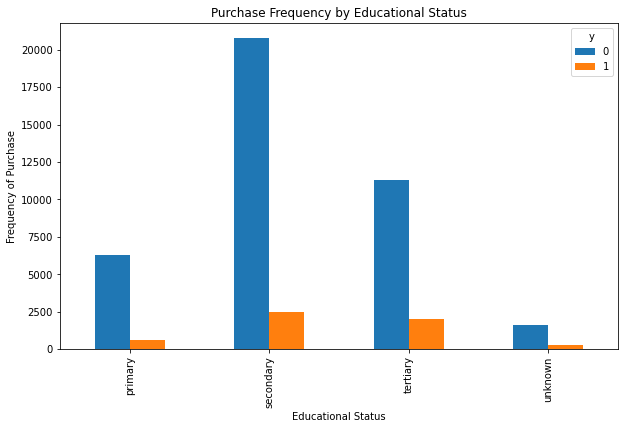

In [126]:
table = pd.crosstab(bank.education, bank1.y)
table.plot(kind='bar', figsize=(10, 6))
plt.title('Purchase Frequency by Educational Status')
plt.xlabel('Educational Status')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_freq_marital_grouped_bar')
plt.show()


In [128]:
bank["contact"].value_counts()

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64